In [7]:
import pandas as pd
import glob
import re
from functools import reduce
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

In [8]:
all_files = glob.glob('My_Python/myCabinetExcelData*.xls')
all_files

['My_Python\\myCabinetExcelData (1).xls',
 'My_Python\\myCabinetExcelData (2).xls',
 'My_Python\\myCabinetExcelData (3).xls',
 'My_Python\\myCabinetExcelData (4).xls',
 'My_Python\\myCabinetExcelData (5).xls',
 'My_Python\\myCabinetExcelData (6).xls',
 'My_Python\\myCabinetExcelData (7).xls',
 'My_Python\\myCabinetExcelData (8).xls',
 'My_Python\\myCabinetExcelData (9).xls',
 'My_Python\\myCabinetExcelData.xls']

In [9]:
all_files_data = [] #저장할 리스트
for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)
all_files_data[0]

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Big data analysis of swimming pools' impact on...,"Elnakat, Afamia; Gomez, Juan D.; Roberts, Jaso...",Inderscience,2015
1,NaN,2,Furthest-Pair-Based Binary Search Tree for Spe...,"Hassanat, A. B. A.",Mary Ann Leibert,2018
2,NaN,3,STGI：a spatio-temporal grid index model for ma...,"Qu, Tengteng; Wang, Lizhe; Yu, Jian; Yan, Jini...",John Wiley & Sons Ltd,2020
3,NaN,4,Big Data Applications in Guangzhou Restaurants...,"Chang, Victor; Ji, Ziyang; Xu, Qianwen Ariel",Mary Ann Leibert,2021
4,NaN,5,An Ensemble-Based Scalable Approach for Intrus...,"Sahu, Santosh Kumar; Mohapatra, Durga Prasad; ...",Mary Ann Leibert,2021
...,...,...,...,...,...,...
95,NaN,96,Real Time Analysis Based on Intelligent Applic...,"Rath, Mamata",IGI Publising,2018
96,NaN,97,2017 Index IEEE Transactions on Big Data Vol. 3,unknown,unknown,2018
97,NaN,98,Guest Editorial: Special Issue on Big Scholar ...,"Lin, Y.; Tong, H.; Tang, J.; Selcuk Candan, K.",unknown,2016
98,NaN,99,A concentric framework for leveraging big data...,"Chuang, Ta-Tao; Nakatani, Kazuo; Patil, Vivek H.",Inderscience,2020


In [10]:
all_files_data_concat = pd.concat(all_files_data, axis = 0, ignore_index = True)
all_files_data_concat

,Unnamed: 0,번호,제목,저자,출판사,출판일
0,NaN,1,Big data analysis of swimming pools' impact on...,"Elnakat, Afamia; Gomez, Juan D.; Roberts, Jaso...",Inderscience,2015
1,NaN,2,Furthest-Pair-Based Binary Search Tree for Spe...,"Hassanat, A. B. A.",Mary Ann Leibert,2018
2,NaN,3,STGI：a spatio-temporal grid index model for ma...,"Qu, Tengteng; Wang, Lizhe; Yu, Jian; Yan, Jini...",John Wiley & Sons Ltd,2020
3,NaN,4,Big Data Applications in Guangzhou Restaurants...,"Chang, Victor; Ji, Ziyang; Xu, Qianwen Ariel",Mary Ann Leibert,2021
4,NaN,5,An Ensemble-Based Scalable Approach for Intrus...,"Sahu, Santosh Kumar; Mohapatra, Durga Prasad; ...",Mary Ann Leibert,2021
...,...,...,...,...,...,...
995,NaN,96,Big Data 2.0: Cataclysm or Catalyst?,unknown,Mary Ann Leibert,2014
996,NaN,97,Overcoming Resistance to Big Data and Operatio...,"Phillips-Wren, Gloria; McKniff, Sueanne",Mary Ann Leibert,2020
997,NaN,98,Big Data and the Rise of Machines in Financial...,unknown,Mary Ann Leibert,2014
998,NaN,99,Call for Special Issue Papers: Deep Learning A...,"Wang, Gai-Ge; Gao, Xiao-Zhi; Pei, Yan",Mary Ann Leibert,2021


In [12]:
all_files_data_concat.to_csv('My_Python/riss_bigdata.csv', encoding = 'utf-8', index = False)

In [13]:
all_title = all_files_data_concat['제목']
all_title

0      Big data analysis of swimming pools' impact on...
1      Furthest-Pair-Based Binary Search Tree for Spe...
2      STGI：a spatio-temporal grid index model for ma...
3      Big Data Applications in Guangzhou Restaurants...
4      An Ensemble-Based Scalable Approach for Intrus...
                             ...                        
995                 Big Data 2.0: Cataclysm or Catalyst?
996    Overcoming Resistance to Big Data and Operatio...
997    Big Data and the Rise of Machines in Financial...
998    Call for Special Issue Papers: Deep Learning A...
999    An Efficient, Ensemble-Based Classification Fr...
Name: 제목, Length: 1000, dtype: object

In [40]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopWords = set(stopwords.words("english"))
lemma = WordNetLemmatizer()
words = []
for title in all_title:
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title))
    EnWordsToken = word_tokenize(EnWords.lower())
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopWords]
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    words.append(EnWordsTokenStopLemma)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\COMPUTER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\COMPUTER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\COMPUTER\AppData\Roaming\nltk_data...


In [41]:
print(words)

[['big', 'data', 'analysis', 'swimming', 'pool', 'impact', 'household', 'electric', 'intensity', 'san', 'antonio', 'texas'], ['furthest', 'pair', 'based', 'binary', 'search', 'tree', 'speeding', 'big', 'data', 'classification', 'using', 'k', 'nearest', 'neighbor'], ['stgi', 'spatio', 'temporal', 'grid', 'index', 'model', 'marine', 'big', 'data'], ['big', 'data', 'application', 'guangzhou', 'restaurant', 'analysis'], ['ensemble', 'based', 'scalable', 'approach', 'intrusion', 'detection', 'using', 'big', 'data', 'framework'], ['online', 'analytical', 'processing', 'business', 'intelligence', 'big', 'data'], ['big', 'data', 'social', 'good', 'drought', 'early', 'warning', 'experience', 'report'], ['tv', 'audience', 'measurement', 'big', 'data'], ['medical', 'school', 'training', 'relate', 'practice', 'evidence', 'big', 'data'], ['toward', 'general', 'framework', 'multimodal', 'big', 'data', 'analysis'], ['deep', 'learning', 'big', 'sparse', 'behavioral', 'data'], ['towards', 'quantifying'

In [42]:
words2 = list(reduce(lambda x, y: x+y, words))
print(words2)

['big', 'data', 'analysis', 'swimming', 'pool', 'impact', 'household', 'electric', 'intensity', 'san', 'antonio', 'texas', 'furthest', 'pair', 'based', 'binary', 'search', 'tree', 'speeding', 'big', 'data', 'classification', 'using', 'k', 'nearest', 'neighbor', 'stgi', 'spatio', 'temporal', 'grid', 'index', 'model', 'marine', 'big', 'data', 'big', 'data', 'application', 'guangzhou', 'restaurant', 'analysis', 'ensemble', 'based', 'scalable', 'approach', 'intrusion', 'detection', 'using', 'big', 'data', 'framework', 'online', 'analytical', 'processing', 'business', 'intelligence', 'big', 'data', 'big', 'data', 'social', 'good', 'drought', 'early', 'warning', 'experience', 'report', 'tv', 'audience', 'measurement', 'big', 'data', 'medical', 'school', 'training', 'relate', 'practice', 'evidence', 'big', 'data', 'toward', 'general', 'framework', 'multimodal', 'big', 'data', 'analysis', 'deep', 'learning', 'big', 'sparse', 'behavioral', 'data', 'towards', 'quantifying', 'psychiatric', 'diagn

In [43]:
count = Counter(words2)
count

Counter({'data': 1232,
         'big': 1110,
         'analytics': 124,
         'based': 121,
         'analysis': 114,
         'driven': 72,
         'system': 67,
         'using': 61,
         'approach': 61,
         'model': 49,
         'issue': 47,
         'learning': 45,
         'application': 42,
         'management': 41,
         'framework': 40,
         'challenge': 38,
         'special': 38,
         'platform': 38,
         'new': 37,
         'algorithm': 36,
         'paper': 34,
         'science': 34,
         'health': 34,
         'cloud': 34,
         'call': 33,
         'research': 32,
         'era': 31,
         'service': 30,
         'processing': 29,
         'performance': 29,
         'network': 29,
         'method': 28,
         'earth': 28,
         'mining': 28,
         'computing': 26,
         'smart': 26,
         'machine': 24,
         'real': 24,
         'intelligence': 23,
         'study': 23,
         'perspective': 23,
         'techn

In [45]:
word_count = dict()
for tag, counts in count.most_common(50):
    if(len(str(tag))>1):
        word_count[tag] = counts
        print("%s : %d" % (tag, counts))

data : 1232
big : 1110
analytics : 124
based : 121
analysis : 114
driven : 72
system : 67
using : 61
approach : 61
model : 49
issue : 47
learning : 45
application : 42
management : 41
framework : 40
challenge : 38
special : 38
platform : 38
new : 37
algorithm : 36
paper : 34
science : 34
health : 34
cloud : 34
call : 33
research : 32
era : 31
service : 30
processing : 29
performance : 29
network : 29
method : 28
earth : 28
mining : 28
computing : 26
smart : 26
machine : 24
real : 24
intelligence : 23
study : 23
perspective : 23
technology : 23
business : 22
opportunity : 22
distributed : 22
world : 22
information : 21
optimization : 21
review : 21
process : 20


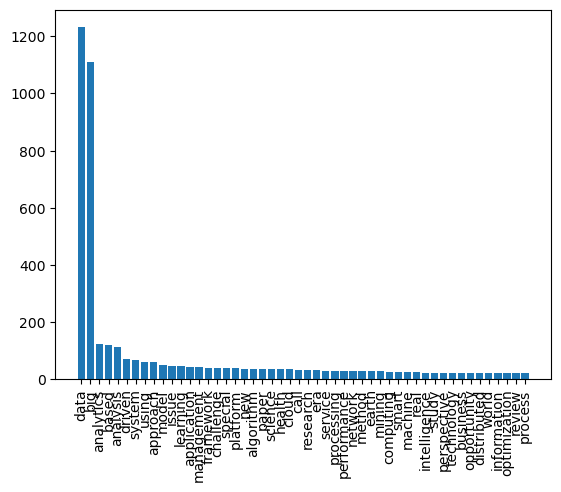

In [53]:
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 'vertical')
plt.show()

In [47]:
all_files_data_concat['doc_count'] = 0
summary_year = all_files_data_concat.groupby('출판일', as_index = False)['doc_count'].count()
summary_year

,출판일,doc_count
0,1999,1
1,2003,1
2,2004,1
3,2011,2
4,2012,13
5,2013,37
6,2014,96
7,2015,76
8,2016,98
9,2017,114


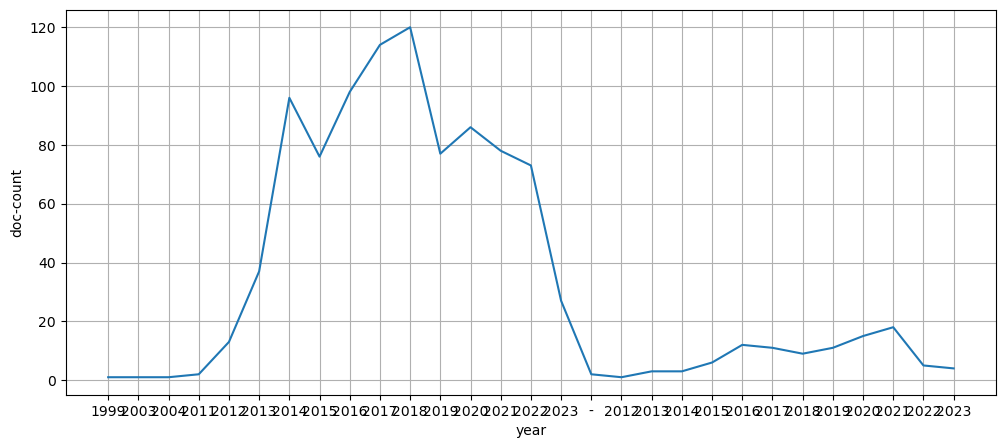

In [48]:
plt.figure(figsize = (12, 5))
plt.xlabel("year")
plt.ylabel("doc-count")
plt.grid(True)
plt.plot(range(len(summary_year)), summary_year['doc_count'])
plt.xticks(range(len(summary_year)), [text for text in summary_year['출판일']])
plt.show()

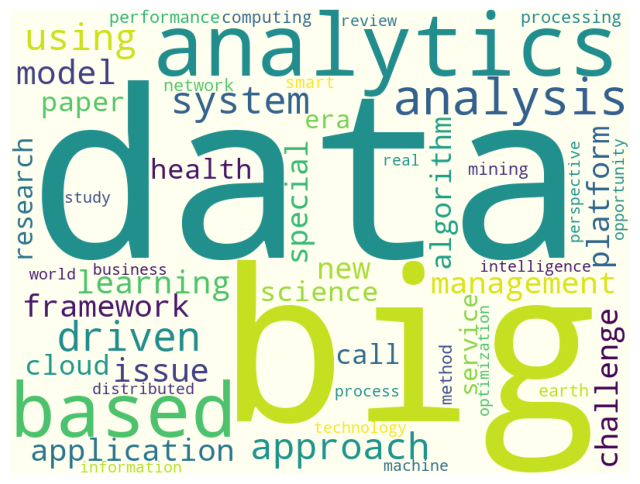

In [49]:
stopwords = set(STOPWORDS)
wc = WordCloud(background_color = 'ivory', stopwords = stopwords, width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()

In [51]:
cloud.to_file("My_Python/riss_bigdata_wordCloud.jpg")